In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

print(tf.__version__)

2.15.0


In [21]:
# Fetch the MNIST data
(X_train, t_train), (X_test, t_test) = keras.datasets.mnist.load_data()
print("Training data:", X_train.shape, t_train.shape)
print("Test data:", X_test.shape, t_test.shape)

# Normalize the values
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

# Mean removal
X_mean = np.mean(X_train, axis=0)
X_train -= X_mean
X_test -= X_mean

# One-hot encoding
T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [3]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model = tf.keras.models.Sequential()

# Input layer representing the (28, 28) image
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

# Convolutional layer with 16 feature maps using 3x3 filters
model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

# Max-pooling layerover 2x2 regions
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model.add(tf.keras.layers.Flatten())

# Fully-connected layer
model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('relu'))

# Softmax output layer over 10 classes
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax'))

# Learning rule
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model.summary())

2023-11-26 14:57:23.117585: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-11-26 14:57:23.117623: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-26 14:57:23.117640: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-26 14:57:23.119312: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-26 14:57:23.121070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 activation (Activation)     (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 100)               270500    
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                        

In [4]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
model.fit(
    X_train, T_train, # training data
    batch_size=64,  # batch size
    epochs=10, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/10


2023-11-26 14:57:24.343919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-11-26 14:57:24.382170: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


844/844 [==============================] - 10s 10ms/step - loss: 0.3787 - accuracy: 0.8884 - val_loss: 0.1907 - val_accuracy: 0.9440
Epoch 2/10
844/844 [==============================] - 8s 9ms/step - loss: 1.2007 - accuracy: 0.8962 - val_loss: 8.7351 - val_accuracy: 0.8310
Epoch 3/10
844/844 [==============================] - 8s 9ms/step - loss: nan - accuracy: 0.4437 - val_loss: nan - val_accuracy: 0.0978
Epoch 4/10
844/844 [==============================] - 8s 9ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 5/10
844/844 [==============================] - 8s 10ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 6/10
844/844 [==============================] - 8s 9ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 7/10
844/844 [==============================] - 8s 10ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 8/10
844/844 [=======================

In [1]:
score = model.evaluate(X_test, T_test)
print('Test loss:', score[0])   
print('Test accuracy:', score[1])

NameError: name 'model' is not defined

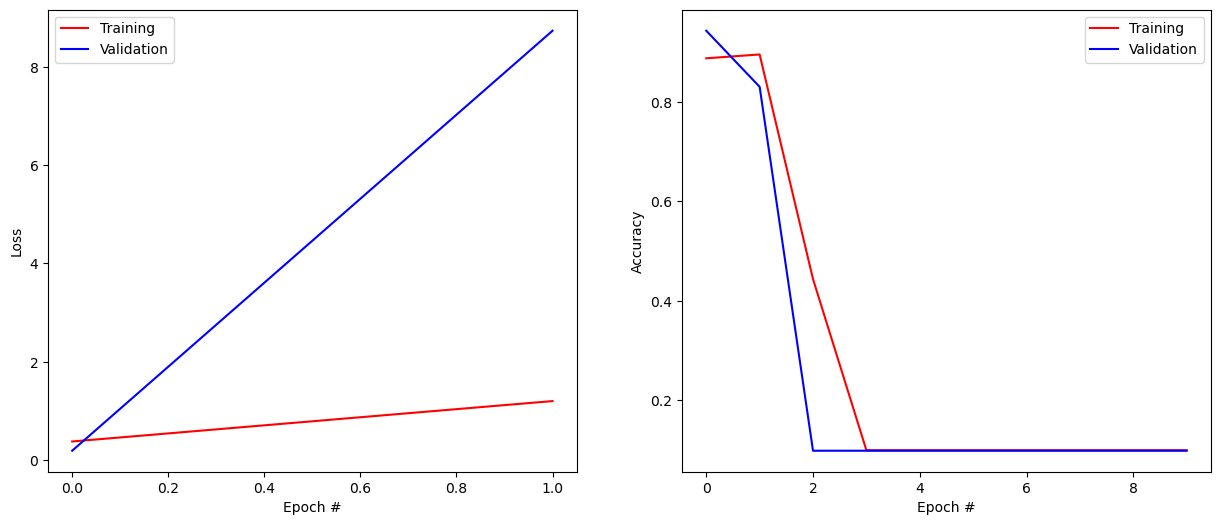

In [6]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [7]:
W = model.layers[0].get_weights()[0]

1


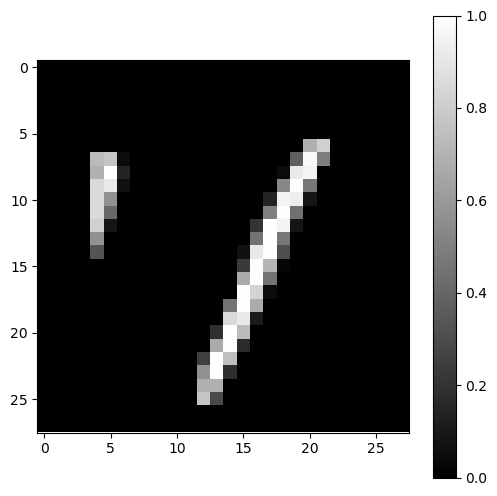

In [8]:
idx = 31727 # or any other digit
x = X_train[idx, :, :, :].reshape(1, 28, 28, 1)
t = t_train[idx]

print(t)

plt.figure(figsize=(6, 6))
plt.imshow(x[0, :, :, 0] + X_mean[:, :, 0], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [9]:
import tensorflow as tf

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[history])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/10
1563/1563 [==============================] - 16s 9ms/step - loss: 1.5351 - accuracy: 0.4399 - val_loss: 1.2820 - val_accuracy: 0.5443
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1904 - accuracy: 0.5793 - val_loss: 1.0966 - val_accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1109 - accuracy: 0.6172 - val_loss: 1.2800 - val_accuracy: 0.5834
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2119 - accuracy: 0.6044 - val_loss: 1.2824 - val_accuracy: 0.5980
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6137 - accuracy: 0.5617 - val_loss: 2.7355 - val_accuracy: 0.4420
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 4.6978 - accuracy: 0.4819 - val_loss: 17.3853 - val_accuracy: 0.4039
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 21.5630 - accuracy: 0.4047 - val_loss: 38.2639 - val

In [10]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

In [11]:
# Visualize the model architecture
tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 0s 73ms/step


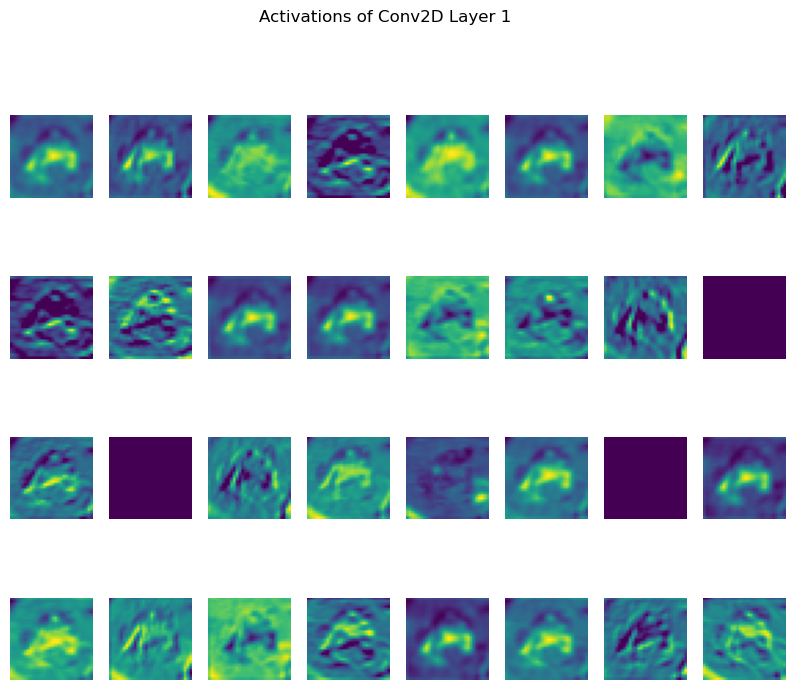

In [12]:
# Visualize layer activations
sample_image = np.expand_dims(train_images[0], axis=0)  # Take the first image from the dataset

# Create models to retrieve layer activations
activations_model_1 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
activations_model_2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[2].output)
activations_model_3 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[4].output)

# Get layer activations
activations_1 = activations_model_1.predict(sample_image)
activations_2 = activations_model_2.predict(sample_image)
activations_3 = activations_model_3.predict(sample_image)

# Plot layer activations
plt.figure(figsize=(10, 8))
for i in range(32):  # Visualize the activations of the third convolutional layer
    plt.subplot(4, 8, i+1)
    plt.imshow(activations_1[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Activations of Conv2D Layer 1')
plt.show()

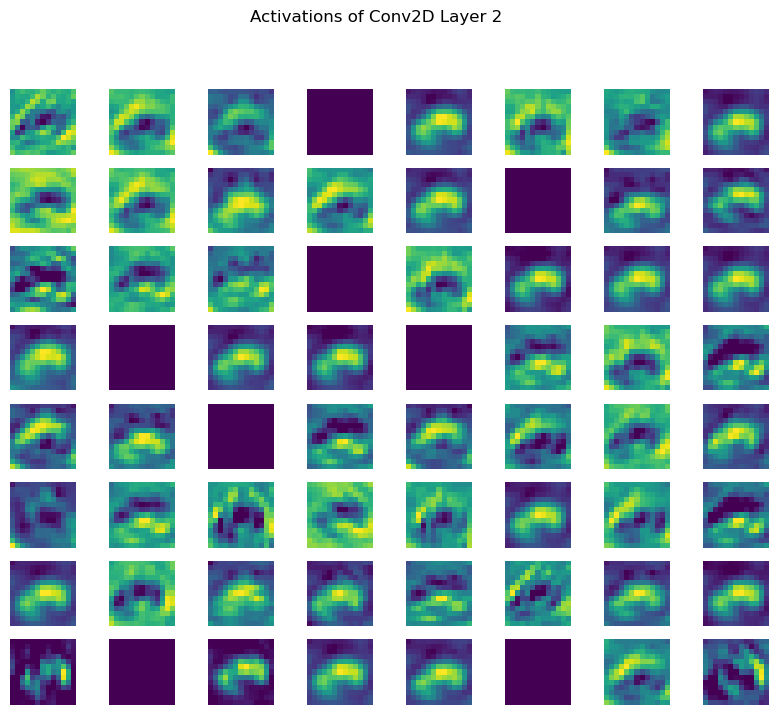

In [13]:
# Activations of Conv2D Layer 2
plt.figure(figsize=(10, 8))
for i in range(64):  # Visualize the activations of the third convolutional layer
    plt.subplot(8, 8, i+1)
    plt.imshow(activations_2[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Activations of Conv2D Layer 2')
plt.show()

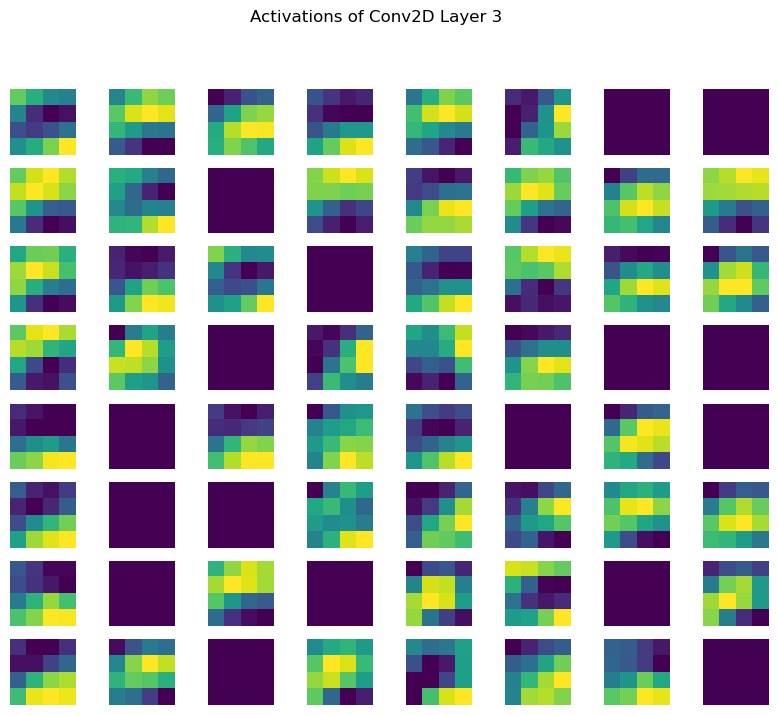

In [14]:
# Activations of Conv2D Layer 3
plt.figure(figsize=(10, 8))
for i in range(64):  # Visualize the activations of the third convolutional layer
    plt.subplot(8, 8, i+1)
    plt.imshow(activations_3[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Activations of Conv2D Layer 3')
plt.show()